In [1]:
%load_ext notexbook

In [2]:
%texify --code-font=Monaco -lh 1.5

<span class="badges">

[![myBinder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/leriomaggio/pytorch-beautiful-ml-data/pydata-global?filepath=1_prelude/ml_data_model.ipynb)
    
[![Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://github.com/leriomaggio/pytorch-beautiful-ml-data/1_prelude/ml_data_model.ipynb)
</span>

<span class="fn"><i>[Note]: </i> This notebook has been designed using the [$\text{no}\TeX\text{book}$](https://github.com/leriomaggio/notexbook-jupyter-theme) Jupyter notebook theme. 
Please **trust** the notebook to enable the theme.</span>

# Prelude: Data for Machine Learning

**Table of Content**

- [*The Model*: Data $\mapsto$ Predictions](#datatopred)
- [Data Representation for Machine Learning](#Data-Representation-for-Machine-Learning)
    - [Features $\mapsto$ Numbers](#feat-to-numbers)
        - [Example: Image Data](#image-example)
    - [Case Study: Textual Data](#case-study)
    - [Onwards](#onward-exercise)
- [Interlude: Efficient (`numpy`) Data Representation](#efficient-numpy)
- [References and Further Reading](#References-and-Further-Readings)

Before going into the details of `data`, `Dataset`, and corresponding abstractions, I would like to briefly discuss the general framework in which Machine Learning (**ML**) algorithms (*generally*) operate.

In particular, while sketching the general *processing pipeline* that data undergoes, I wish to address 
**how** a ML model *is expecting* the data to be *represented* in order to be processed.

Understanding data characteristics and _representation_ is one of the key aspects in every data science process, which become particularly meaningful when this also entangles ML.

<a name="datatopred"></a>
## *The Model*: Data $\mapsto$ Predictions

> Machine learning is all about mapping data to prediction


![from data to predictions](imgs/ml_model.png)

The ultimate goal of a machine learning model is to discover **general**[$^1$](#fn1) patterns in the 
data. We can imagine this process as a (trivial) "pipeline" in which the `Model` acts as a *mapper* from some input (i.e. `Data`) to output `Predictions`.
The nature of these predictions depends on the specific learning problem at hand: 
it can be either the `class` data belongs to, or its corresponding `cluster`. 


<span id="fn1"><i>[1]: </i> We will come back again on this later on, better understanding the meaning of _general_ pattern, and _generalisation_ of a Machine learning model.</span>

However a *more realistic* pipeline is never that simple.

<img src="imgs/ml_full_picture.png" class="maxw100" />

It involves a lot of _Data Science_ to prepare `raw data`[$^2$](#fn2) into actual (ML) data 
suitable for the `Model`. This **pre-processing** may include _cleaning_ the dataset from 
spurious samples, or _validating_ data consistency.

Moreover, the `Model` itself does also require a series of steps and operations, 
before being finally exercised in production. This is usually the case of model *monitoring*, and 
*logging*, as well as model *serving*.

This topic is indeed very interesting, and would be worth a whole new tutorial by itself. I won't go further on this, but the interested readers may find some recommendation on the subject in the [**Further Reading**](#References-and-Further-Readings) Section.

<span id="fn2"><i>[2]:</i> The term **raw data** here is used in a very general sense, referring to data in its original, and unaltered form.</span>

## Data Representation for Machine Learning

_(With very few exceptions)_

In Machine learning data is assumed to be represented by a Matrix of size `[n_samples, n_features]`, namely the **feature matrix**:

$$
{\rm feature~matrix:~~~} {\bf X}~=~\left[
\begin{matrix}
x_{11} & x_{12} & \cdots & x_{1D}\\
x_{21} & x_{22} & \cdots & x_{2D}\\
x_{31} & x_{32} & \cdots & x_{3D}\\
\vdots & \vdots & \ddots & \vdots\\
\vdots & \vdots & \ddots & \vdots\\
x_{N1} & x_{N2} & \cdots & x_{ND}\\
\end{matrix}
\right]
$$

Moreover, in the case of _Supervised learning_ settings, there is also the **label** vector, of size `n_samples`, containing the list of labels for each samples.

$$
{\rm label~vector:~~~} {\bf y}~=~ [y_1, y_2, y_3, \cdots y_N]
$$

In this notation, we are indicating with $N$ the number of samples, and $D$ the number of features.

- $N$ (`n_samples`): each sample is an item to process (e.g. to classify).
  A sample can be a document, a picture, a sound, a video, an astronomical object,
  a row in database or CSV file,
  or whatever you can describe with a fixed set of quantitative traits.
  
- $D$ (`n_features`): features or (*traits*, or *observations*) represent the information that can be used to describe each item in a **quantitative**[$^3$](#fn3) manner. In fact, features are generally **real-valued**, but may also be boolean, **discrete-valued** or any combination of those.

The number of **features** _must_ be fixed in advance.

Each sample (data point) is a row in the feature data array, and each feature **may be** a column 
(if features can be expressed by `1D vector`). 

Features can be also be very high dimensional (e.g. millions of features), but sometimes also very sparse. This is a case where `scipy.sparse` matrices (and `torch.sparse`) [tensors](https://pytorch.org/docs/stable/sparse.html?highlight=torch%20sparse) can be very useful. 

These structures are much more memory-efficient than **dense** `numpy` arrays.

<span id="fn3"><i>[3]</i> Emphasis on **quantitative** here!</span>

<a name="feat-to-numbers"></a>

### Features $\mapsto$ Numbers

Therefore, it is important to keep in mind that **features** must be _ultimately_ **numbers** in order to be processed by a Machine Learning model.

This applies to any format the initial `raw data` may have (e.g. *textual*, *tabular*, *images*); but this sometimes does not even require any further **transformations**[$^4$](#fn4).

<span id="fn4"><i>[4]: </i>Please bear in mind this word when we will later introduce the concept of samples _transformations_ and _transformers_ </span>

<a name="image-example"></a>
#### Example: Image Data

Let's consider the image of this cute little puppy 🐶, for example: 

![🐶](./puppy.jpg)

<span class="fn"><i>Source: </i> [https://cdn.shopify.com/s/files/1/2327/5701/articles/Omega-3-For-Dogs_1200x.jpg](https://cdn.shopify.com/s/files/1/2327/5701/articles/Omega-3-For-Dogs_1200x.jpg)</span>

This image can be indeed represented as a `3D array`: (`channel`, `width`, `height`). In particular this image has `3` channels, namely **R**ed, **G**reen, **B**lue, in the so-called [`RGB`](https://en.wikipedia.org/wiki/RGB_color_model) colour model.

For each channel $C$, every element (i.e. `pixel`) of their $W \times H$ matrix correspond to an intensity value.

<img src="https://e2eml.school/images/image_processing/three_d_array.png" class="maxw40" />

<span class="fn"><i>Source: </i> [https://e2eml.school/images/image_processing/three_d_array.png](https://e2eml.school/images/image_processing/three_d_array.png)</span>

If we now should think of a particular data structure to represent this data, there are so many clues that lead immediately to **NumPy** and `ndarray`: **(1)** contiguous memory with **(2)** fixed-size (i.e. $C \times W \times H$), and **(3)** homogeneous content (i.e. `uint8` or `float`).
This is **no surprise**, and `ndarray` is indeed the main <ins>reference data structure</ins> [expected](https://scikit-learn.org/stable/tutorial/basic/tutorial.html#loading-an-example-dataset) by ML models in `scikit-learn`.

Let's now read this image using `matplotlib` ([`imread`](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.imread.html)), and see what do we get.

In [3]:
from matplotlib import pyplot as plt
import numpy as np

In [4]:
image = plt.imread("./puppy.jpg")
print(f"Image Type: {type(image)}")

Image Type: <class 'numpy.ndarray'>


In [5]:
print("Image shape: (W:{} x H:{} x C:{})".format(*image.shape))

Image shape: (W:630 x H:1200 x C:3)


**Note**: 
In `numpy`, the channel is storead as to the *last* dimension ($W \times H \times C$); whereas in `torch` the channel is expected to be the *first* dimension ($C \times W \times H$).


Let's show `image` using `matplotlib.imshow`...

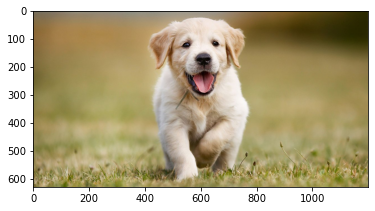

In [6]:
plt.imshow(image)
plt.show()

... and let's also have a look at the actual content of the array

In [7]:
image[:10, :5, 0]  # (with some slicing, for readability)

array([[124, 121, 118, 119, 119],
       [123, 119, 117, 118, 118],
       [124, 120, 117, 118, 118],
       [124, 121, 118, 119, 119],
       [124, 120, 118, 118, 119],
       [123, 119, 117, 118, 118],
       [123, 119, 116, 117, 118],
       [126, 122, 120, 120, 121],
       [124, 120, 118, 119, 120],
       [125, 121, 119, 120, 121]], dtype=uint8)

Let's show the same image per single channel

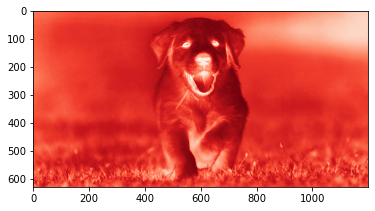

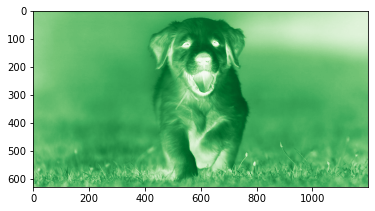

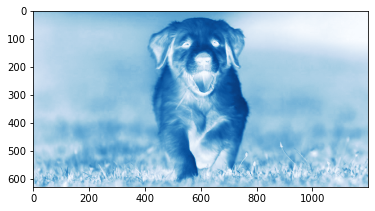

In [8]:
R, G, B = image[..., 0], image[...,1], image[..., 2]
cmaps = ("Reds", "Greens", "Blues")
for channel, colour_map in zip((R, G, B), cmaps):
    plt.imshow(channel, cmap=colour_map)
    plt.show()

... and then back into RGB with the three channels combined as a double check:

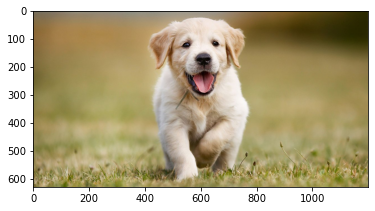

In [9]:
rgb_stack = (np.dstack((R,G,B))).astype(np.uint8)
plt.imshow(rgb_stack)
plt.show()

💡

If now you are thinking something like: 

>(**A.**)"*Hang on, how this matches with the Data Representation model introduced before?* 🤔 
> _You just demonstrated that image pixels are indeed numbers, and so potentially being used as `features` [$^{note}$](#note). However, you also said that Images are `3D-array` objects, so (**B.**) how does having **multiple** ($>2$) dimensions fit with that Representation model?_ 
> (**C.**) _Is this any *special* case or exception to the model?_" 

If that resembles _more or less_ what you are really thinking right now, well...**congrats indeed!!**

The answer to this question will be given in details in the [last](#efficient-numpy) section of this notebook. Short answer for now is: "_No, Images are **no** special case. The model still complies!_"

<span id="note" class="fn"><i>[Note]: </i> This is exactly what it is, especially in the Deep Learning case! </span>

[$\uparrow$ top](#top)

---
<a name="case-study"></a>

### Case Study: Textual Data

Now it is time to crack on with our first *case study* 🙌. 

Assume we have some data in *textual* format that we want to use as input to some ML model. To make it even more fun, instead of working with _standard_ textual data, let's imagine we have some **source code** listings we want to process. 

Our examplar data will be **two functions**, written in our most favourite programming language[$^5$](#fn5): `init_random_weights_tensor`, and `init_random_weights_array`:


<span id="fn5"><i>[5]: </i>Examples adapted from [Learning PyTorch with Examples](https://pytorch.org/tutorials/beginner/pytorch_with_examples.html) tutorial.</span>


In [10]:
# function 1
def init_random_weights_tensor(D_in=1000, H=100, D_out=10):
    """Initialise random weights for MLP as 
    PyTorch (Float) Tensors on CPU.
    
    Parameters
    ----------
    D_in : int 
        Input dimension (default 1000)
    H : int 
        Hidden dimension (default 100)
    D_out : int  
        Output dimension (default 10)
        
    Returns
    -------
    w1, w2: torch.Tensor
        The two random weight tensors of size [D_in, H], and [H, D_out], 
        respectively.
    """
    dtype = torch.float
    device = torch.device("cpu")    
    # Randomly initialize weights
    w1 = torch.randn(D_in, H, device=device, dtype=dtype)
    w2 = torch.randn(H, D_out, device=device, dtype=dtype)
    return w1, w2

In [11]:
# function 2
def init_random_weights_array(D_in=1000, H=100, D_out=10):
    """Initialise random weights for MLP as NumPy Array.
    
    Parameters
    ----------
    D_in : int 
        Input dimension (default 1000)
    H : int 
        Hidden dimension (default 100)
    D_out : int  
        Output dimension (default 10)
        
    Returns
    -------
    w1, w2: array_like
        The two random weight matrices of size [D_in, H], and [H, D_out], 
        respectively.
    """
    # Randomly initialize weights
    w1 = np.random.randn(D_in, H)
    w2 = np.random.randn(H, D_out)
    return w1, w2

At a first glance, the code of these two functions look quite similar. We want to **extract** and **encode** their textual information to make them become our **features** for a ML model. 

In a more realistic scenario, we could repeat this process for all the functions in an entire source code repository, aiming at extracting meaningful insights on the software from the source code text. 

This whole concept of [Mining Software Repositories](https://github.com/topics/mining-software-repositories) is indeed quite fun, and it is a research field by itself: **Machine Learning for Source Code**.


#### 1. Extract the Source Code Text

As you may expect, the first thing we need to do is to convert the source code into actual textual data for further processing. Once we will have the text, we will workout a solution to transform text into _numerical_ features for ML.

To process those two function objects, we could leverage on Python's amazing [**introspection**](https://medium.com/better-programming/python-reflection-and-introspection-97b348be54d8) features: the [`inspect`](https://docs.python.org/3/library/inspect.html) module in the **Standard Library** allows to process _live_ Python objects, and the [`getsourcelines`](https://docs.python.org/3/library/inspect.html#inspect.getsourcelines) function looks exactly what we need to extract the source code text from the two functions!

In [12]:
from inspect import getsourcelines

numpy_fn_text, _ = getsourcelines(init_random_weights_array)
torch_fn_text, _ = getsourcelines(init_random_weights_tensor)

In [13]:
# let's have a quick look
numpy_fn_text[:10]

['def init_random_weights_array(D_in=1000, H=100, D_out=10):\n',
 '    """Initialise random weights for MLP as NumPy Array.\n',
 '    \n',
 '    Parameters\n',
 '    ----------\n',
 '    D_in : int \n',
 '        Input dimension (default 1000)\n',
 '    H : int \n',
 '        Hidden dimension (default 100)\n',
 '    D_out : int  \n']

#### 2. Filtering textual data

As you can see, we have a lot of information from the *original* source code text that we might want to get rid of as per our own objective. Tabulations and carriage returns (`\n`, `\s`, `\t`); non alphanumeric symbols (e.g. `:`, `"`, `()`); words in different cases (`Array` & `array`), just to mention the most obvious ones. 

This is just a glimpse of what entangles a standard [NLP](https://en.wikipedia.org/wiki/Natural_language_processing) pipeline, and we will be using standard Python to build a simple text *filtering* function. 

More advanced and complete solutions might involve the adoption of specialised packages like [`spacy`](https://spacy.io/), or [`nltk`](https://github.com/nltk/nltk).

**The `lazy_filter` function**

Our *filtering* function needs to apply in sequence the following operations to each code word:
1. *replace* all punctuation characters with blank (`" "`) in each word
2. *strip* all trailing spaces
3. *filter* out any resulting empty string
4. *lower* all terms.

We will be starting from source code lines as represented by a list of strings (as returned by `getsourcelines`), and we will return a unique string corresponding to the *filtered* source code text. Each word will be separted by a blank space (`" "`). 

There are indeed many ways in which we could implement this function, and some of them are indeed very simple (and yet quite *boring*™️ 😅). 

For example, we could join all the lines into a single string object, and implement our filter by using `str.replace + str.lower`. *Nothing absolutely wrong with it!*

However *what if*... (1) data granularity changes (e.g. from functions to entire packages) so increasing the memory footprint required?; (2) data comes from a `async` I/O stream rather than residing as a whole in main memory?; (3) I need to interleave more specialised operations specific to source code text processing?...

In the real case, these are all indeed very convincing reasons not to immediately fall for the simplest solutions, with all the due *caveat* of what [**premature optimisation**](https://wiki.c2.com/?PrematureOptimization) might imply. 

*For the task at hand*, I could bring in so many reasons to try to convince you about the implementation I am about to present. *The truth is*: I wanted to **make it fun**, less obvious, and potentially useful to learn something new. 

The `filter` function I have in mind has to be `lazy`, so that it could extensively leverage on **iterables**[$^6$](#fn6) and `Py3` _lazy iteration_ protocol. Therefore, we will be composing our pipeline in a [*functional fashion*](https://docs.python.org/3/howto/functional.html), using a combination of [`map`](https://docs.python.org/3/library/functions.html#map), [`filter`](https://docs.python.org/3/library/functions.html#filter) and [`itertools`](https://docs.python.org/3/library/itertools.html) [`chain.from_iterables`](https://docs.python.org/3/library/itertools.html#itertools.chain.from_iterable) functions. 

The [**Further Reading**](#References-and-Further-Readings) Section contains more links and references on the subject, and how this relates to *Data Science* in the first place 🙃 .

Let's now implement our `lazy_filter` function:

<span id="fn6"><i>[6]: </i>Please bear in mind that *Iterable* $\neq$ *Iterator*. More information [here](https://treyhunner.com/2018/02/python-range-is-not-an-iterator/) </span>

In [14]:
from itertools import chain
from string import punctuation
from typing import Sequence

def lazy_filter(fn_lines: Sequence[str]) -> str:
    # separate each word in each line
    terms = map(lambda l: l.strip().split(), fn_lines)
    # chain all the lines
    terms = chain.from_iterable(terms)
    # Replace each punctuation character from each term with blank
    terms = map(lambda t: ''.join(map(lambda c: c if c not in punctuation else " ", 
                                      t)), terms)
    # Transform in lowercase and remove trailing spaces
    terms = map(lambda t: t.lower().strip(), terms)
    # filter out any resulting empty term (i.e. those of only by punctuations e.g. "----")
    terms = filter(lambda t: len(t.strip()) > 0, terms)
    # join all together and reduce to lower case
    return ' '.join(terms)

In [15]:
numpy_fn_text = lazy_filter(numpy_fn_text)
torch_fn_text = lazy_filter(torch_fn_text)

let's now have a look at the result

In [16]:
torch_fn_text

'def init random weights tensor d in 1000 h 100 d out 10 initialise random weights for mlp as pytorch float tensors on cpu parameters d in int input dimension default 1000 h int hidden dimension default 100 d out int output dimension default 10 returns w1 w2 torch tensor the two random weight tensors of size d in h and h d out respectively dtype torch float device torch device  cpu randomly initialize weights w1 torch randn d in h device device dtype dtype w2 torch randn h d out device device dtype dtype return w1 w2'

#### 3. From words to numbers

Transforming text into **features**

Great, now we do have all the textual information we wanted to retain, and ready to proceed with the last step of our processing: **transform** text into a vector of **features**. 

To do so, we will be using the [`TfIdfVectorizer`](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html#sklearn.feature_extraction.text.TfidfVectorizer) from [`sklearn.feature_extraction.text`](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.feature_extraction.text). In particular, we will `fit_transform` the `vectorizer` on the textual content of the two functions (i.e. the `corpora`).

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
corpora = [numpy_fn_text, torch_fn_text]
X = vectorizer.fit_transform(corpora)
print(f"X: {X.shape}, of dtype {X.dtype}")

X: (2, 48), of dtype float64


The $X$ matrix is the **samples** $\times$ **features** transformation we were aiming for, encoding text data into a vectorised representation of `np.float64`. 

In more details:

(A) The first dimension of $X$ is equal to `2`, as per the **two** samples we are considering (i.e. the two Python functions). 
(B) The total number of *features* is `48`: each feature corresponds to a **unique** word extracted from the `corpora` by the `vectorizer`. This list of unique words is what constitutes the [**vocabulary**](https://nlp.stanford.edu/IR-book/pdf/03dict.pdf) ($V$).

To inspect the terms in the `vocabulary`, an so the labels associated to each of the `48` dimensions in our vectorised representation, we can call the [`get_feature_names`](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html#sklearn.feature_extraction.text.TfidfVectorizer.get_feature_names) method of the `vectorizer`.

In [18]:
print(vectorizer.get_feature_names())

['10', '100', '1000', 'and', 'array', 'as', 'cpu', 'def', 'default', 'device', 'dimension', 'dtype', 'float', 'for', 'hidden', 'in', 'init', 'initialise', 'initialize', 'input', 'int', 'like', 'matrices', 'mlp', 'np', 'numpy', 'of', 'on', 'out', 'output', 'parameters', 'pytorch', 'randn', 'random', 'randomly', 'respectively', 'return', 'returns', 'size', 'tensor', 'tensors', 'the', 'torch', 'two', 'w1', 'w2', 'weight', 'weights']


**Large room for improvements**:

Looking a bit more carefully at the extracted features, we can immediately think of methods to improve our very *basic* pipeline. For example: we might want to normalise *plurals* (e.g. `weight` and `weights`), as well as *third-person* forms (e.g. `tensor`, `tensors`); remove less-informative terms, such as `of`, `and`, `the` (usually referred to as *stop-words*); or inject code-specific strategies to deal with identifiers (e.g. `init` for `initialise`, `out` for `output`).

When it comes to more realistic scenarios, the number of unique terms in the dictionary (and so corresponding *features*) can largely impact the performance, and so we **definitely** want to reduce the number of dimensions as much as possible to cope with sparsity and the [**Curse of Dimensionality**](https://en.wikipedia.org/wiki/Curse_of_dimensionality).

Let's take a look at the `vectorizer.vocabulary_` itself, i.e. a Python dictionary mapping each term to its corresponding **index** (in range `[0, 47]`)

In [19]:
vectorizer.vocabulary_

{'def': 7,
 'init': 16,
 'random': 33,
 'weights': 47,
 'array': 4,
 'in': 15,
 '1000': 2,
 '100': 1,
 'out': 28,
 '10': 0,
 'initialise': 17,
 'for': 13,
 'mlp': 23,
 'as': 5,
 'numpy': 25,
 'parameters': 30,
 'int': 20,
 'input': 19,
 'dimension': 10,
 'default': 8,
 'hidden': 14,
 'output': 29,
 'returns': 37,
 'w1': 44,
 'w2': 45,
 'like': 21,
 'the': 41,
 'two': 43,
 'weight': 46,
 'matrices': 22,
 'of': 26,
 'size': 38,
 'and': 3,
 'respectively': 35,
 'randomly': 34,
 'initialize': 18,
 'np': 24,
 'randn': 32,
 'return': 36,
 'tensor': 39,
 'pytorch': 31,
 'float': 12,
 'tensors': 40,
 'on': 27,
 'cpu': 6,
 'torch': 42,
 'dtype': 11,
 'device': 9}

**What do those numbers represent?**

The last bit we need to discuss is what is indeed contained in those vectors. 

The `TfIdfVectorizer` transforms the data using the [*Term Frequency-Inverse Document Frequency*](https://nlp.stanford.edu/IR-book/pdf/06vect.pdf) (`tfidf`) representation schema. 

**tl;dr**: $tf-idf(t, d) = tf(t, d) \times idf(t)$, for each document $d$, and each term $t$. 
The term frequency ($tf$) is the number of occurrences of $t$ in $d$, whereas the document frequency ($df$) is number of documents in which the term *t* appears.[$^7$](#fn7)

<span id="fn7"><i>[7]: </i>There exist different formulations of the *tf-idf* schema (e.g. $\log(tfidf)$) to deal with numerical issues occurring with divisions and multiplications. See [here](https://en.wikipedia.org/wiki/Tf%E2%80%93idf#Inverse_document_frequency_2) for a quick reference.</span>

In [20]:
X

<2x48 sparse matrix of type '<class 'numpy.float64'>'
	with 82 stored elements in Compressed Sparse Row format>

*Unsurprisingly*, the returned matrix *X* is a [`scipy.sparse.csr`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.csr_matrix.html#scipy.sparse.csr_matrix) matrix as not **all** the terms appear in the two functions, e.g. the words `array` and `tensor` are unique for the two functions, respectively.

Sparse representation avoids storing *zeros*, and `CSR` format is particularly suited for array operations. Moreover, `scikit-learn` completely supports this data format, without necessarily having to fall back to its corresponding `dense` version.

For the sole sake of visualising the actual content though, we will transform `X` into a *dense* `numpy.ndarray` array, having `zeros` corresponding to missing *vocabulary terms*:

In [21]:
X.toarray()

array([[0.1492349 , 0.1492349 , 0.1492349 , 0.07461745, 0.31461667,
        0.07461745, 0.        , 0.07461745, 0.22385235, 0.        ,
        0.22385235, 0.        , 0.        , 0.07461745, 0.07461745,
        0.2984698 , 0.07461745, 0.07461745, 0.07461745, 0.07461745,
        0.22385235, 0.10487222, 0.10487222, 0.07461745, 0.20974445,
        0.10487222, 0.07461745, 0.        , 0.2984698 , 0.07461745,
        0.07461745, 0.        , 0.1492349 , 0.37308725, 0.07461745,
        0.07461745, 0.07461745, 0.07461745, 0.07461745, 0.        ,
        0.        , 0.07461745, 0.        , 0.07461745, 0.22385235,
        0.22385235, 0.07461745, 0.22385235],
       [0.10887677, 0.10887677, 0.10887677, 0.05443838, 0.        ,
        0.05443838, 0.1530225 , 0.05443838, 0.16331515, 0.4590675 ,
        0.16331515, 0.38255625, 0.1530225 , 0.05443838, 0.05443838,
        0.21775354, 0.05443838, 0.05443838, 0.05443838, 0.05443838,
        0.16331515, 0.        , 0.        , 0.05443838, 0.        ,
   

[$\uparrow$ top](#top)

---

<a name="onward-exercise"></a>

### Onwards 

For this case study, I would propose the following three *assignments* for a better understanding of processing textual data (*spoiler alert*: we will see another example of textual data, in the following Chapter).

###### Ex 1: Which terms? 

Given the `vectorizer`, and the `X` matrix in the previsous example, create for the two samples dictionary mapping each (non-missing) term to its corresponding `tfidf` value.

*Hint*: Things you might want to consider: `vectorizer.vocabulary_`; `numpy.nonzero`

In [22]:
# your code here

---

###### Ex 2: Any Similarity?

Try to calculate the similarity of the two functions, as expressed by the similarity of their corresponding feature vectors (*hint*: the `cosine_similarity` is a good metric to use).

Q: What consideration may you derive from their similarity, if compared to other metrics (e.g. *Jaccard Index*)?

In [23]:
# your code here

---

###### Ex 3: Improve the Pipeline

There is plenty of room for improvements to the pre-processing pipeline before transforming terms into features. Try to put some of those in place, by modifying the `lazy_pipeline` function, or working with the integration of custom `analyzer`, `preprocessor`, and `tokenizer` integrated into the `TfIdfVectorizer` constructor via corresponding parameters.  

*Quick reference* $\rightarrow$ [`TfIdfVectorizer`](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) 

In [24]:
# your code here

[$\uparrow$ top](#top)

---

<a name="efficient-numpy"></a>


## Interlude: Efficient (`numpy`) Data representation 

**Note: feel free to skip this section, or to come back to it later**

So far, we have been discussing about the *standard model* used to represent data for (almost) *any* Machine Learning algorithm. 
This <ins>very same</ins> model is general enough to also apply in full to **Deep Learning**, with no loss of generality. 

In the case of **multi-dimensional data** (e.g. _Images_), this model still complies as it is always possible to un-[`ravel`](https://numpy.org/doc/stable/reference/generated/numpy.ravel.html) multiple dimensions into a single one. 
And in fact, this is exactly the point I wish to discuss in this section! 🙌 

Incidentally (*not really* 😏 ), this consideration perfectly matches how NumPy allocates memory[$^8$](#fn8) internally for multi-dimensional arrays!
A schematic of the NumPy `ndarray` object model is shown in the picture below[$^{9}$](#fn9)

![ndarray model](https://github.com/leriomaggio/numpy-euroscipy/raw/master/images/ndarray_with_details.png)

The main idea is that memory is allocated once, and all operations *potentially* touching or altering its content (e.g. `reshape`), do change the **metadata** instead (*whenever possible*).

With that in mind, now the question is **whether** and **how** this *standard model* of the `samples x features` matrix for ML data complies with NumPy memory allocation schema[$^{10}$](#fn10).


<span id="fn8"><i>[8]: </i> See **Chapter $2.3$** in the [NumPy Book](http://web.mit.edu/dvp/Public/numpybook.pdf).</span>
<span id="fn9"><i>[9]: </i>Source: [NumPy Tutorial](https://github.com/leriomaggio/numpy-euroscipy/) @ **EuroSciPy 2015** @ Cambrdige, UK. All credits to my friend [@riko](https://github.com/rik0) for the wonderful schematic picture!</span>
<span id="fn10"><i>[10]: </i>Please have a look [here](https://realpython.com/numpy-array-programming/)  for a Primer on Vectorised code, and NumPy performance gain over standard Python [lists](https://realpython.com/numpy-array-programming/#counting-easy-as-1-2-3).</span>

**Experimenting**

To experiment on this, we are going to create an array `a` of size $512 \times 512 \times 3$ of type `uint8` that mimics a standard image. Then we assume we are going to store a total of $1,000$ of this image in our dataset, so $1,000$ will be our number of **samples**. 

In [25]:
N = 512
S = 1000
a = np.random.randint(0,255,(N,N, 3), dtype=np.uint8)

In our simple experiment, we are going to vary the shape of our `ndarray` dataset, and move the dimension used for the **sample** axis through the four possible dimensions.

**Note**
This examples have been adapted from the Stackoverflow entr *The accessing time of a numpy array is impacted much more by the last index compared to the second last* ([here](https://stackoverflow.com/questions/44115571/the-accessing-time-of-a-numpy-array-is-impacted-much-more-by-the-last-index-comp "The accessing time of a numpy array is impacted much more by the last index compared to the second last")), also related to these two: [\[1\]](https://stackoverflow.com/questions/15340781/python-numpy-data-types-performance "Python Numpy Data Types Performance"), [\[2\]](https://stackoverflow.com/questions/44078327/fastest-approach-to-read-thousands-of-images-into-one-big-numpy-array "Fastest approach to read thousands of images into one big numpy array").



**1.** $[S \times 512 \times 512 \times 3]$

In [26]:
%%timeit
# Samples dimension: 0; single sample data on axes (1, 2, 3);
imgs = np.empty((S,N,N,3), dtype='uint8')
for s in range(S):
    imgs[s,:,:] = a

371 ms ± 12 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


**2.** $[512 \times S \times 512 \times 3]$

In [27]:
%%timeit
# Samples dimension: 1; single sample data on axes (0, 2, 3);
imgs = np.empty((N,S,N,3), dtype='uint8')
for s in range(S):
    imgs[:,s,:] = a

427 ms ± 15.6 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


**3.** $[512 \times 512 \times S \times 3]$

In [28]:
%%timeit
# Samples dimension: 2; single sample data on axes (0, 1, 3);
imgs = np.empty((N,N,S,3), dtype='uint8')
for s in range(S):
    imgs[:,:,s,:] = a

3.46 s ± 52.6 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


**4.** $[512 \times 512 \times 3 \times S]$

In [29]:
%%timeit
# Samples dimension: 3; single sample data on axes (0, 1, 2);
imgs = np.empty((N,N,3,S), dtype='uint8')
for s in range(S):
    imgs[...,s] = a

8.59 s ± 241 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


As probably expected, performance gets worse and worse as we shift the axis towards the inner dimension, with all **due caveats** of not skipping on the details of processor caching, etc. 

A quite straightforward explanation for this resides (as it is almost customary) in how much work can be delegated to low-level C code when accessing *contiguous* memory blocks, and how many access in total are required for the different configurations. 

A sketch of how **NumPy** calculates access to elements with `shape` and `strides` is shown in the picture below[$^{9}$](#fn9).

![Numpy Storage Index](https://raw.githubusercontent.com/leriomaggio/numpy-euroscipy/master/images/storage_index.png)

With the `strides` and `shape` calculations, NumPy can access any one element in `imgs` in (about) the same time. However, if it is possible to access **contiguous blocks** (e.g. `imgs[s,...]`) it can delegate more of the action to low-level compiled and processor code. In the case of `imgs[:,s,...]` those blocks aren't quite as big, but are getting bigger along we are moving towards the inner dimension.

In fact, in the four different cases: 

(1) `[s,:,:,:]` iterates `S` times on `512x512x3` blocks;

(2) `[:,s,:,:]` has to divide `S-times` access into `512` blocks of `512x3` each;

(3) `[:,:,s,:]` has to divide `S-times` access into `512x512` blocks of `3` elements each;

(4) `[:,:,:,s]` has to perform `Sx512x512x3` individual access.

**Therefore** in conclusion, storing **samples** as the *first* dimension is indeed the most memory-efficient schema we can put in place to acces different samples in a ML dataset!

[$\uparrow$ top](#top)

---

## References and Further Readings

* Model Serving and MLOPs
    - [Machinen Learning Model Serving Options](https://itnext.io/machine-learning-model-serving-options-1edf790d917)
    - [Continuous Delivery and Automation Pipelines in Machine Learning](https://cloud.google.com/solutions/machine-learning/mlops-continuous-delivery-and-automation-pipelines-in-machine-learning)
    - [MLOps best practice](https://github.com/microsoft/MLOps)
    
* Functional Programming and Data Science
    - [Functional Programming HOWTO (from official doc)](https://docs.python.org/3/howto/functional.html)
    - [Python Range is not an Iterator](https://treyhunner.com/2018/02/python-range-is-not-an-iterator/)
    - ["Learning Data Science Using Functional Python", PyData Seattle 2015 talk by *J. Grus*](https://www.youtube.com/watch?v=ThS4juptJjQ)
    - ["The Joy of Functional Programming (for Data Science)" by H. Wickham](https://www.youtube.com/watch?v=bzUmK0Y07ck)
    - [Functional Programming for Machine Learning](https://www.kdnuggets.com/2015/04/functional-programming-big-data-machine-learning.html)
    
* Machine Learning on Source Code
    - ["Introduction to Information Retrieval" by *C. Manning*](https://nlp.stanford.edu/IR-book/pdf/irbookonlinereading.pdf)
    - [The Vectors of Code: Foundations of Machine Learning for Software](https://insights.sei.cmu.edu/sei_blog/2019/06/vectors-of-code-on-the-foundations-of-machine-learning-for-software.html)
    - [`scipy.sparse`](https://docs.scipy.org/doc/scipy/reference/sparse.html)
    
* Vectorisation and Memory Efficient Representation
    - [Look Ma, No For Loops](https://realpython.com/numpy-array-programming/)
    - [Internal Memory Layout of an `ndarray`](https://numpy.org/doc/stable/reference/arrays.ndarray.html#internal-memory-layout-of-an-ndarray)
    - [Writing Memory Efficient Operators (**Pytorch**)](https://github.com/pytorch/pytorch/wiki/Writing-memory-format-aware-operators)
    - [PyTorch Memory Format Tutorial](https://pytorch.org/tutorials/intermediate/memory_format_tutorial.html)